In [ ]:
#Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
X,y = load_iris(return_X_y=True, as_frame=True)

In [ ]:
df_raw = X
df_raw['species'] = y
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df_raw.sample(10, random_state=2025)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
2,4.7,3.2,1.3,0.2,0
148,6.2,3.4,5.4,2.3,2
112,6.8,3.0,5.5,2.1,2
132,6.4,2.8,5.6,2.2,2
0,5.1,3.5,1.4,0.2,0
113,5.7,2.5,5.0,2.0,2
34,4.9,3.1,1.5,0.2,0
51,6.4,3.2,4.5,1.5,1
135,7.7,3.0,6.1,2.3,2
5,5.4,3.9,1.7,0.4,0


In [ ]:
df_baking = df_raw.copy()
df_baking.columns =  df_baking.columns.str.replace(' ','_').str.replace('(','').str.replace(')','')
species_new = {0:'setosa',1:'versicolor',2:'virginica'}
df_baking['species'] = df_baking['species'].replace(species_new).astype('category')

df=df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sepal_length_cm  150 non-null    float64 
 1   sepal_width_cm   150 non-null    float64 
 2   petal_length_cm  150 non-null    float64 
 3   petal_width_cm   150 non-null    float64 
 4   species          150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [ ]:
df.sample(10, random_state=2025)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
2,4.7,3.2,1.3,0.2,setosa
148,6.2,3.4,5.4,2.3,virginica
112,6.8,3.0,5.5,2.1,virginica
132,6.4,2.8,5.6,2.2,virginica
0,5.1,3.5,1.4,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica
34,4.9,3.1,1.5,0.2,setosa
51,6.4,3.2,4.5,1.5,versicolor
135,7.7,3.0,6.1,2.3,virginica
5,5.4,3.9,1.7,0.4,setosa


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1, stratify=df['species'], random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((135, 5), (15, 5))

In [ ]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,135.0,5.818519,0.813798,4.3,5.10,5.8,6.4,7.9
sepal_width_cm,135.0,3.059259,0.452076,2.0,2.80,3.0,3.4,4.4
petal_length_cm,135.0,3.745185,1.764396,1.0,1.55,4.4,5.1,6.9
petal_width_cm,135.0,1.200741,0.760449,0.1,0.30,1.3,1.8,2.5


,count,unique,top,freq
species,135,3,setosa,45


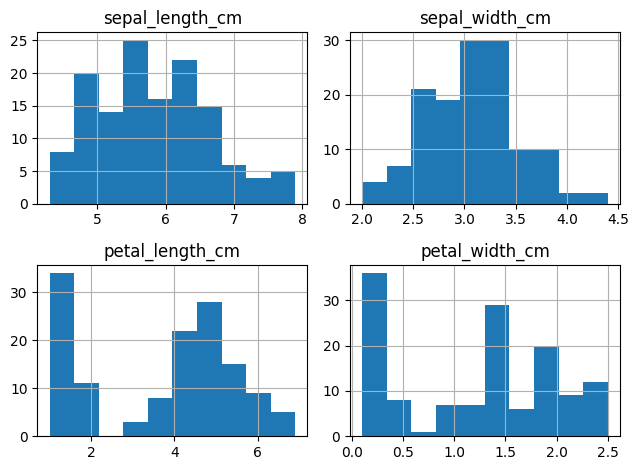

In [ ]:
df_train.hist()
plt.tight_layout()
plt.show()

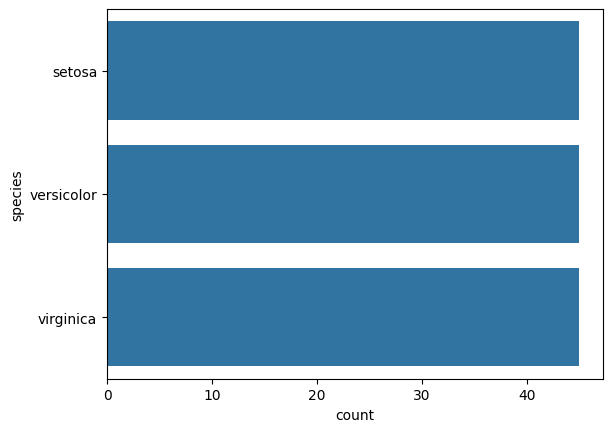

In [ ]:
sns.countplot(df_train, y='species')
plt.show()

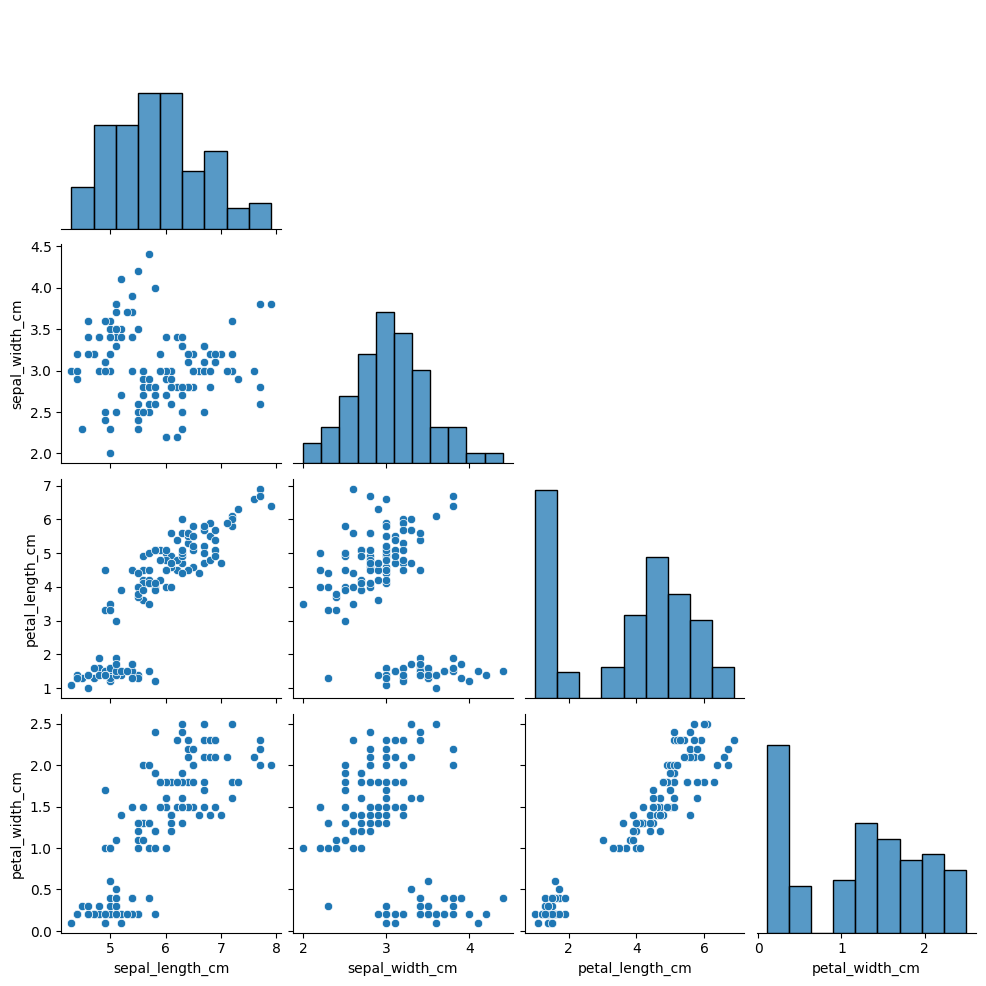

In [ ]:
sns.pairplot(df_train, corner=True)
plt.show()

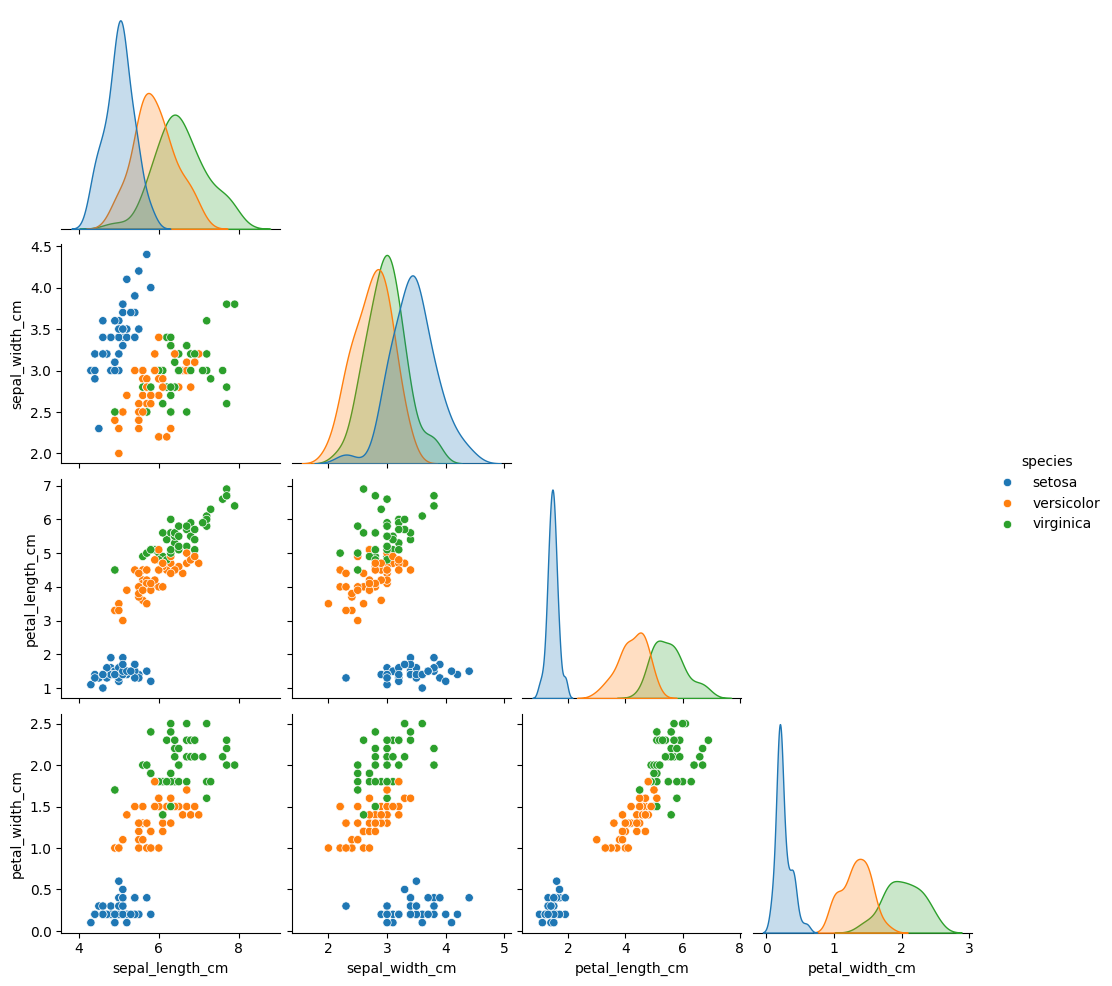

In [ ]:
#analisis bivariado
sns.pairplot(df_train, hue='species', corner=True)
plt.show()

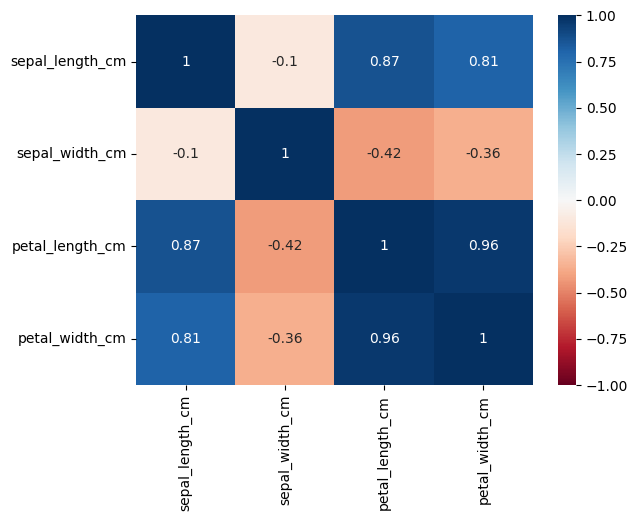

In [ ]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

In [ ]:
#Step 4 ML
X_train = df_train.drop(columns='species')
y_train = df_train['species']

X_test = df_test.drop(columns='species')
y_test = df_test['species']

X_test.shape , y_test.shape


((15, 4), (15,))

In [ ]:
encoder = LabelEncoder() #Instancia de la clase LabelEncoder
y_train_enc = encoder.fit_transform(y_train) #Para la columna de aprendizaje se encodea con fit_transform
y_test_enc = encoder.transform(y_test) #Para la columna de prueba se encodea con transform

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=40, max_depth=2)
tree_clf.fit(X_train, y_train_enc)

DecisionTreeClassifier(max_depth=2, random_state=40)

In [ ]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 40,
 'splitter': 'best'}

In [ ]:
y_hat = tree_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test_enc, y_hat)}')

Accuracy: 1.0


In [ ]:
tree_clf.get_depth()

2

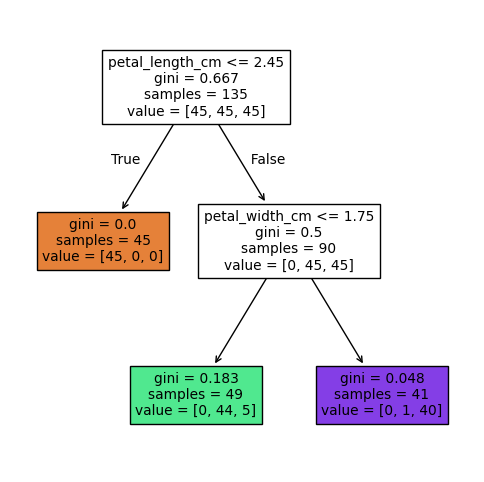

In [ ]:
plt.figure(figsize=(6,6))
plot_tree(tree_clf, feature_names=X_train.columns, filled=True, impurity=True)
plt.show()

------

Ahmed, M. et al (2020). Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT). Conference paper InECCE2019 Lecture Notes in Electrical Engineering ((LNEE,volume 632))

In [ ]:
df_raw = pd.read_csv('/content/Maternal Health Risk Data Set.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df_raw.sample(10, random_state=2025)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
109,32,140,100,7.9,98.0,78,high risk
185,55,100,65,6.1,98.0,66,low risk
402,35,100,70,7.8,98.0,60,low risk
800,32,120,80,6.8,98.0,70,mid risk
684,32,140,100,6.9,98.0,78,high risk
555,50,130,100,16.0,98.0,75,mid risk
34,21,75,50,6.1,98.0,70,low risk
689,40,160,100,19.0,98.0,77,high risk
172,20,100,90,7.1,98.0,88,low risk
528,15,78,49,7.5,98.0,77,low risk


In [ ]:
#Step 2 Preprocessing
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking['risklevel'] = df_baking['risklevel'].astype('category')
df_baking['heartrate'] = df_baking['heartrate'].apply(lambda x: 76 if x < 60 else x)

df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          1014 non-null   int64   
 1   systolicbp   1014 non-null   int64   
 2   diastolicbp  1014 non-null   int64   
 3   bs           1014 non-null   float64 
 4   bodytemp     1014 non-null   float64 
 5   heartrate    1014 non-null   int64   
 6   risklevel    1014 non-null   category
dtypes: category(1), float64(2), int64(4)
memory usage: 48.8 KB


In [ ]:
df.sample(10,random_state=2025)

,age,systolicbp,diastolicbp,bs,bodytemp,heartrate,risklevel
109,32,140,100,7.9,98.0,78,high risk
185,55,100,65,6.1,98.0,66,low risk
402,35,100,70,7.8,98.0,60,low risk
800,32,120,80,6.8,98.0,70,mid risk
684,32,140,100,6.9,98.0,78,high risk
555,50,130,100,16.0,98.0,75,mid risk
34,21,75,50,6.1,98.0,70,low risk
689,40,160,100,19.0,98.0,77,high risk
172,20,100,90,7.1,98.0,88,low risk
528,15,78,49,7.5,98.0,77,low risk


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.15, random_state=2025, stratify=df['risklevel'])
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((861, 7), (153, 7))

In [ ]:
#Step 3 EDA
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,861.0,29.897793,13.658161,10.0,19.0,25.0,39.0,66.0
systolicbp,861.0,112.926829,18.419353,70.0,95.0,120.0,120.0,160.0
diastolicbp,861.0,76.292683,13.882909,49.0,65.0,80.0,90.0,100.0
bs,861.0,8.732334,3.282029,6.0,6.9,7.5,8.0,19.0
bodytemp,861.0,98.647387,1.357077,98.0,98.0,98.0,98.0,103.0
heartrate,861.0,74.314750,7.551660,60.0,70.0,76.0,80.0,90.0


,count,unique,top,freq
risklevel,861,3,low risk,345


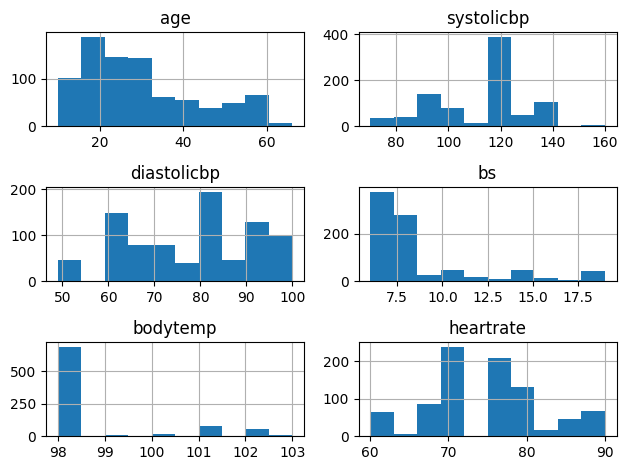

In [ ]:
df_train.hist()
plt.tight_layout()
plt.show()

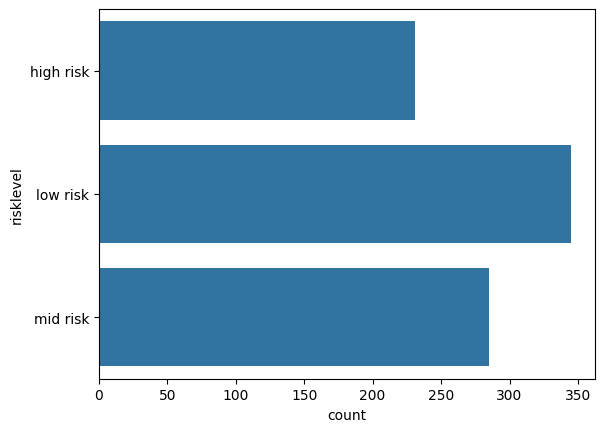

In [ ]:
sns.countplot(df_train, y='risklevel')
plt.show()

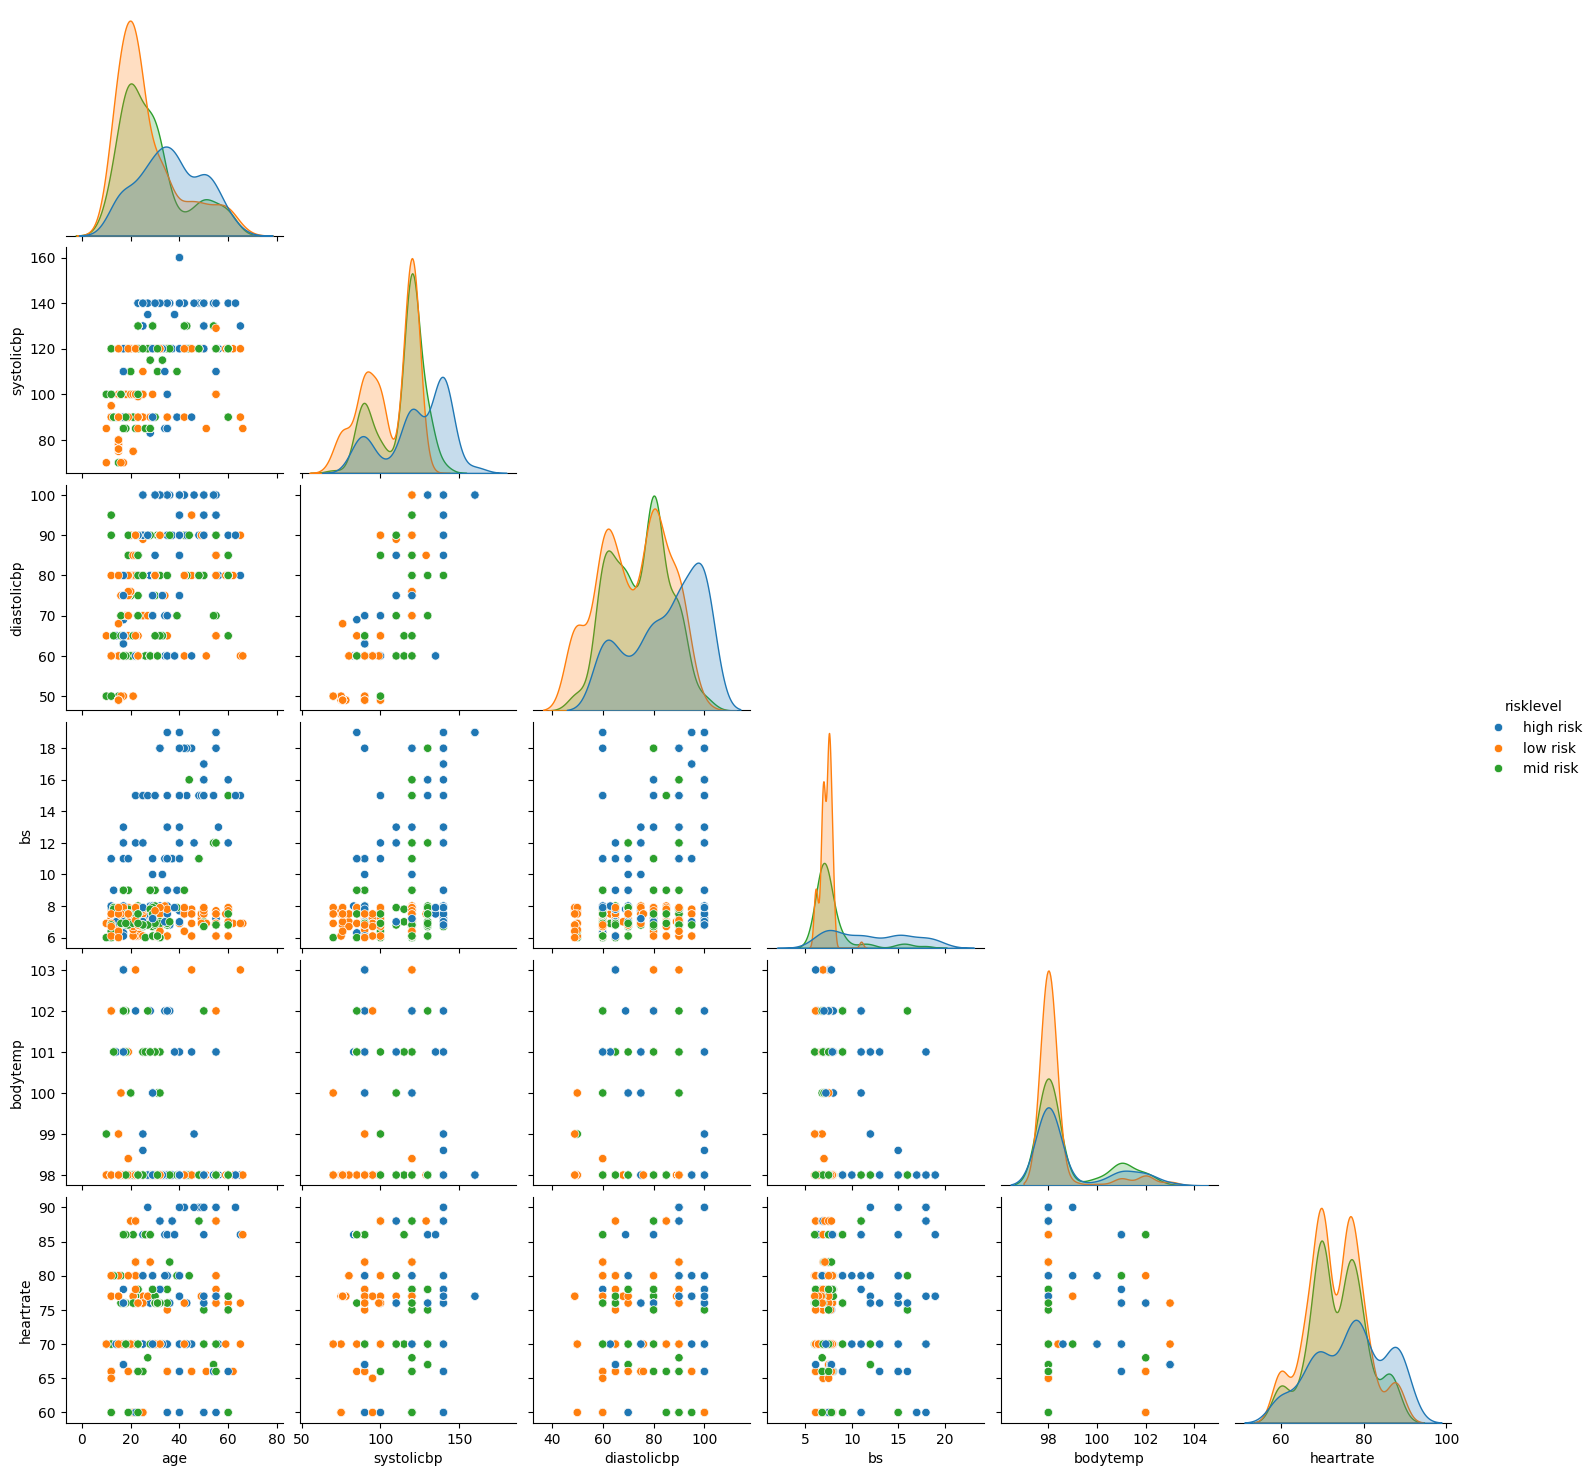

In [ ]:
sns.pairplot(df_train, corner=True, hue='risklevel')
plt.show()

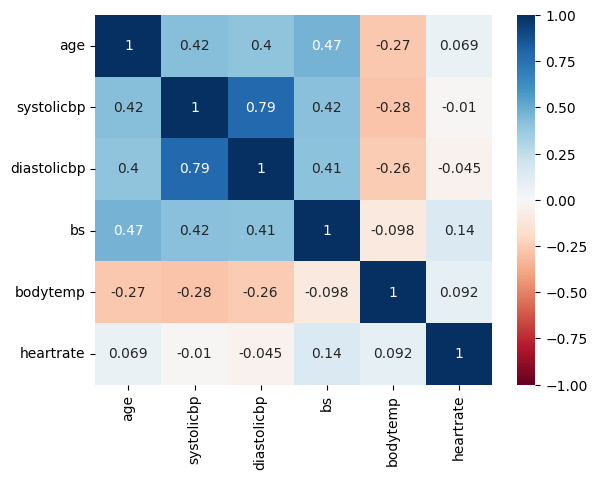

In [ ]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

In [ ]:
#Step 4 ML
#Step 4 ML
X_train = df_train.drop(columns='risklevel')
y_train = df_train['risklevel']

X_test = df_test.drop(columns='risklevel')
y_test = df_test['risklevel']

X_test.shape , y_test.shape

((153, 6), (153,))

In [ ]:
encoder = LabelEncoder() #Instancia de la clase LabelEncoder
y_train_enc = encoder.fit_transform(y_train) #Para la columna de aprendizaje se encodea con fit_transform
y_test_enc = encoder.transform(y_test) #Para la columna de prueba se encodea con transform

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=2025, class_weight='balanced')
tree_clf.fit(X_train, y_train_enc)

DecisionTreeClassifier(class_weight='balanced', random_state=2025)

In [ ]:
y_hat = tree_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test_enc, y_hat)}')

Accuracy: 0.9019607843137255


In [ ]:
tree_clf.get_depth()

17

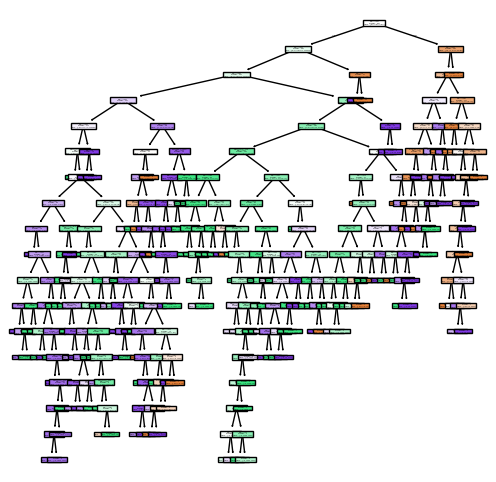

In [ ]:
plt.figure(figsize=(6,6))
plot_tree(tree_clf, feature_names=X_train.columns, filled=True, impurity=True)
plt.show()

In [ ]:
tree_clf_cv = GridSearchCV(
    tree_clf,
    param_grid={
        'max_depth':[1,2,3,4,5,6,7],
        'min_samples_leaf':[1,2,4,6]
    },
    cv = 5,
    scoring='accuracy'
)
#Con este algoritmo buscamos los mejores parametros de tree decision
tree_clf_cv.fit(X_train, y_train_enc)
tree_clf_cv.best_params_

{'max_depth': 7, 'min_samples_leaf': 1}